In [1]:
import cv2
import numpy as np

In [3]:
x = np.uint8([250])
y = np.uint8([10])
x + y

array([4], dtype=uint8)

In [4]:
print (x,y)
print (x+y)

[250] [10]
[4]


In [5]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [1]:
import cv2
import numpy as np

In [2]:
def nothing(x):
    pass

In [3]:

cv2.namedWindow('image')
cv2.createTrackbar('weight', 'image', 0, 255, nothing)
img1 = cv2.imread('test1.jpg')
img2 = cv2.imread('test2.jpg')

while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight','image')
    dst = cv2.addWeighted(img1,weight/255,img2 ,1-weight/255 , 0)
    cv2.imshow('image', dst)

    
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [4]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [6]:
from matplotlib import pyplot as plt
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

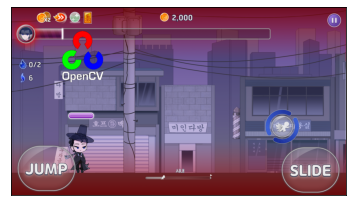

In [7]:
pltImage(img1)

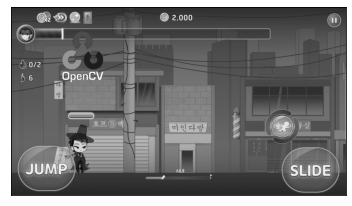

In [32]:
img1gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
pltImage(img1gray)

In [33]:
roi = img1[0:rows, 0:cols]
img1_bg = cv2.bitwise_and(roi,roi, mask = mask_inv)

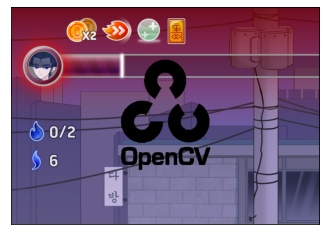

In [34]:
pltImage(img1_bg)

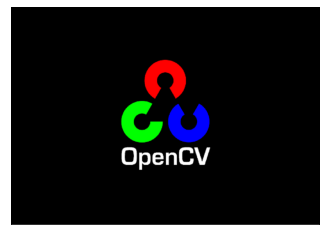

In [35]:
img1_fg = cv2.bitwise_and(roi,roi, mask = mask)
pltImage(img1_fg)

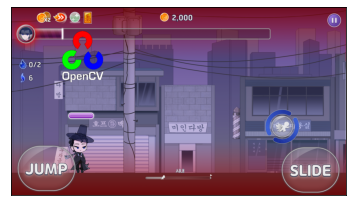

In [36]:
dst = cv2.add(img1_bg, img1_fg)
img1[0:rows, 0:cols] = dst
pltImage(img1)